<a href="https://www.kaggle.com/code/parisrohan/hotel-demand?scriptVersionId=98004090" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 1. Data collection and initial analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [2]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the dataset and store it into a dataframe
df_data = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')
df_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#shape of dataset
df_data.shape

(119390, 32)

### Feature Description

* **is_canceled** : Value indicating if the booking was canceled (1) or not (0) - Target feature
* hotel : Hotel (H1 = Resort Hotel or H2 = City Hotel)
* lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* arrival_date_year : Year of arrival date
* arrival_date_month : Month of arrival date
* arrival_date_week_number : Week number of year for arrival date
* arrival_date_day_of_month : Day of arrival date
* stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* adults : Number of adults
* children : Number of children
* babies : Number of babies
* meal : Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
* country : Country of origin. Categories are represented in the ISO 3155–3:2013 format
* market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)
* previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking
* previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking
* reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.
* assigned_room_type : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
* booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
* deposit_type : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
* agent : ID of the travel agency that made the booking
* company : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
* days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer
* customer_type : Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
* adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
* required_car_parking_spaces : Number of car parking spaces required by the customer
* total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)
* reservation_status : Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why 
* reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
#From the above information we can see that the datatype of reservation_status_date is object -> we need to convert it into datetime
df_data['reservation_status_date'] = pd.to_datetime(df_data['reservation_status_date'], format='%Y-%m-%d')

In [7]:
#check for null values
df_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
#get categorical and numerical features
cat_cols = [col for col in df_data.columns if df_data[col].dtype=='object']
print('Categorical features are: ', cat_cols)

print('\n')

num_cols = [col for col in df_data.columns if df_data[col].dtype!='object' and col!='is_canceled']
print('Numerical features are: ', num_cols)

Categorical features are:  ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


Numerical features are:  ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date']


## 2. EDA

Text(0.5, 1.0, 'Target feature distribution')

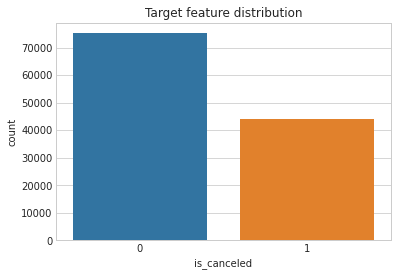

In [9]:
#Distribution of data in target feature
sns.countplot(x='is_canceled', data=df_data)
plt.title('Target feature distribution')

In [10]:
#Get number of distinct values from categorical features
for col in cat_cols:
    print(col, np.count_nonzero(df_data[col].unique()))

hotel 2
arrival_date_month 12
meal 5
country 178
market_segment 8
distribution_channel 5
reserved_room_type 10
assigned_room_type 12
deposit_type 3
customer_type 4
reservation_status 3


In [11]:
#create a function to plot charts for categorical features
def plot_cat_features(DataFrame, feature):
    # Check the distribution of hotel
    plt.figure(figsize=(15,5))

    #plot pie chart
    plt.subplot(1,2,1)
    label = DataFrame[feature].value_counts().index
    label_count = DataFrame[feature].value_counts().values

    plt.pie(data=DataFrame, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)

    #Target feature distribution with the given feature
    plt.subplot(1,2,2)
    sns.countplot(x='is_canceled', data=DataFrame ,hue=feature)

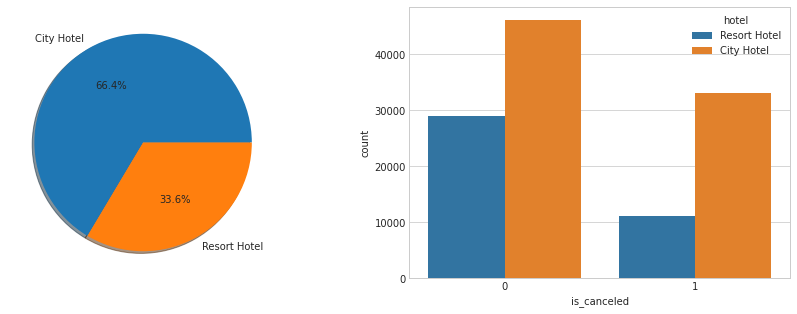

In [12]:
plot_cat_features(df_data, 'hotel')

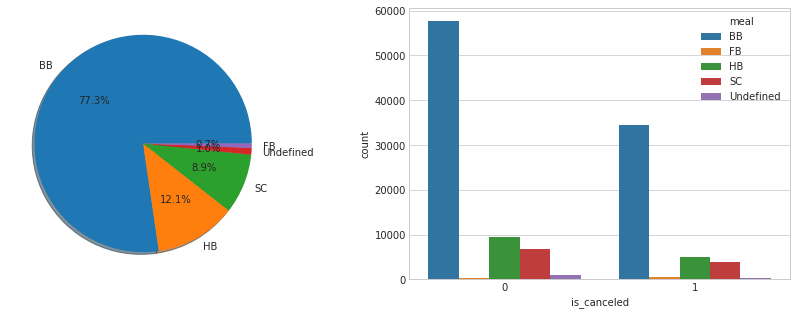

In [13]:
# Check the distribution of meal
plot_cat_features(df_data, 'meal')

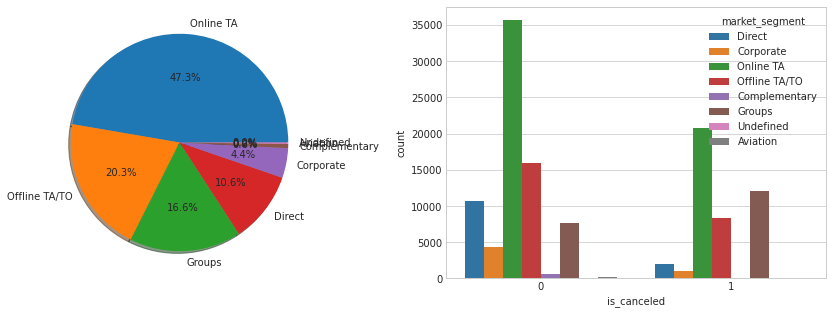

In [14]:
# Check the distribution of market_segment
plot_cat_features(df_data, 'market_segment')

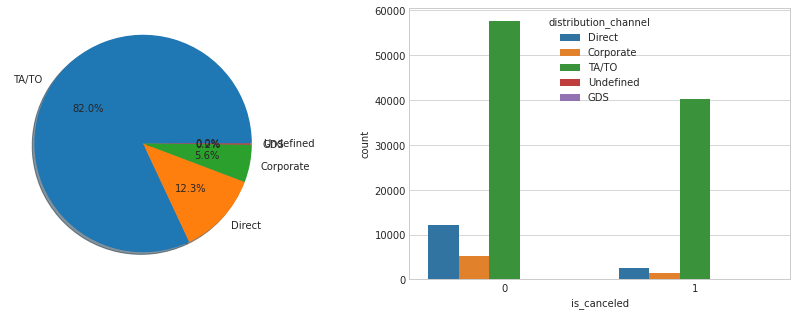

In [15]:
plot_cat_features(df_data, 'distribution_channel')

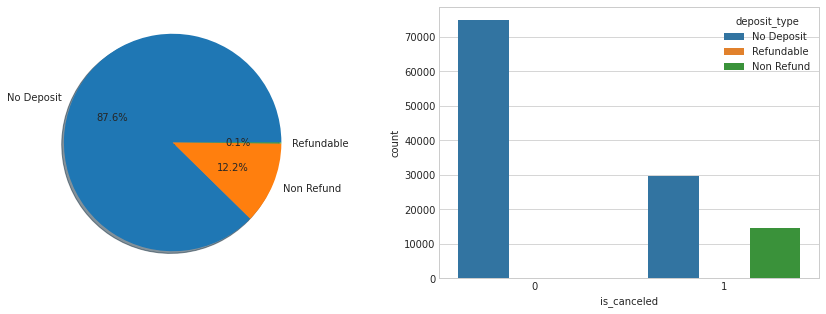

In [16]:
plot_cat_features(df_data, 'deposit_type')

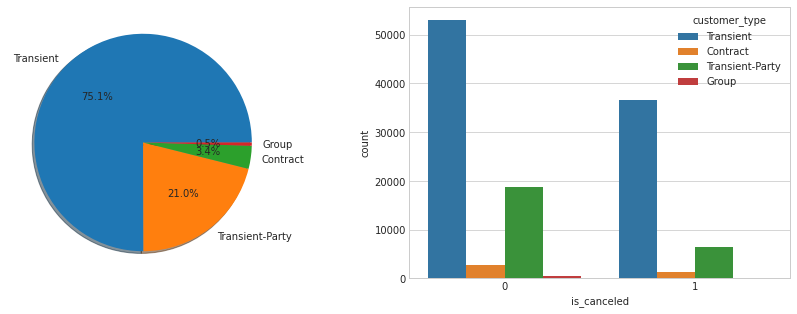

In [17]:
plot_cat_features(df_data, 'customer_type')

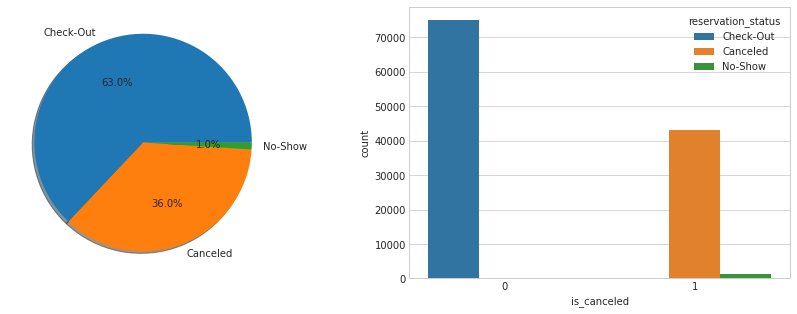

In [18]:
plot_cat_features(df_data, 'reservation_status')

In [19]:
#Check for unique values in numerical data
for col in num_cols:
    print(col,df_data[col].nunique())

lead_time 479
arrival_date_year 3
arrival_date_week_number 53
arrival_date_day_of_month 31
stays_in_weekend_nights 17
stays_in_week_nights 35
adults 14
children 5
babies 5
is_repeated_guest 2
previous_cancellations 15
previous_bookings_not_canceled 73
booking_changes 21
agent 333
company 352
days_in_waiting_list 128
adr 8879
required_car_parking_spaces 5
total_of_special_requests 6
reservation_status_date 926


## 3. Data preprocessing

### 3.1 Handle missing values

In [20]:
# country, agent and company have missing values
df_data.dropna(axis=1,how='any',inplace=True)

In [21]:
df_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

### 3.2 Feature Engineering

In [22]:
#Once reservation_status_date has been converted into datetime, we will extract the day, month and year features from it just like the arrival date features.
df_data['reservation_status_day'] = df_data['reservation_status_date'].dt.day
df_data['reservation_status_month'] = df_data['reservation_status_date'].dt.month
df_data['reservation_status_year'] = df_data['reservation_status_date'].dt.year

#Drop the reservation_status_date feature
df_data.drop('reservation_status_date', axis=1, inplace=True)

In [23]:
#Create a new feature named 'TotalFamily' which is the addition of 'adults' and 'babies'
df_data['TotalFamily'] = df_data['adults'] + df_data['babies']
df_data.drop(['adults', 'babies'],axis=1, inplace=True)